# Text Analytics Final Project
## Northwestern University
## Spring 2025

For your final project in Text Analytics, you will be working in groups of 4-5 to dissect a dataset, build a model that predicts something within that dataset, and create an interactive tool to display your results. You will also create a 10 minute presentation displaying your findings, your interactive tool, and anything else to accompany your project. This presentation should be recorded before the start of Week 10. These presentations will be collected together and shown for class on Week 10.

You will have the option to choose **one** of the following datasets for your project. The options will have unique and shared tasks that must be completed, any you may create additional components as you see fit. Each option has easier and more difficult parts to it, as labeled below.

**Please write to Evan by the end of class on Week 6:**
* The members of your group
* Which task you will be working on

If you cannot find a group to work with you, please let Evan know ASAP.

**Your final submission will be three things:**
* A Github repo with your code and results, with instructions on how to run the code
* A powerpoint presentation detailing your project and findings
* A video presenting your presentation and code

## Option 1: Visual and Genre Classification

* Data Processing: Easy
* Modeling: Hard
* Interactive: Medium

This dataset is a unique collection of high-quality movie and series poster images from [IMDB](https://www.imdb.com/), meticulously handpicked to represent their respective genres accurately. Accompanying these images are detailed plot summaries, each containing more than 150 words, providing rich textual data for analysis. 

The dataset focuses on four primary genres: Action, Comedy, Horror, and Romance. The combination of visual and textual data makes this dataset ideal for multimodal analysis and genre classification tasks. It offers an excellent opportunity for researchers and enthusiasts to delve into the world of movies and series, explore genre characteristics, and develop models that can understand and predict genre based on visual cues and plot descriptions. This dataset is a valuable resource for anyone interested in film studies, machine learning, and data science.

You are tasked to do the following:


* Load in the data and analyze each column.
* Clean the movie summary column in any way you see fit.
* Build a summarization tool and summarize a few of the movies.
* Build at least **four** models on the dataset. You must have at least one naive bayes model, one generalized linear model (ex: logistic regression), and one tensorflow model (ex: LSTM). 
* Evaulate the models in terms of overall accuracy and accuracy by genre.
* For your tensorflow model(s), plot your models and plot accuracy over epoch number.
* Show the most important words from each model and build a word cloud accompanying it. 
* Find movies that had a different prediction based on the model. Explain why you think those models predicted one genre vs. the other.
* Build an interactive tool that can take a real or fake movie summary, clean the text, and predict the movie genre based on your models.
* Add any other techniques taught from the course that could be applied for this project.
* Present these findings in a 10 minute video with slides, sample code and a demonstration of your interactive tool.
* BONUS (optional): extract the images and map them with the genre of movie. Build a model classifying the genre based on the movie images.

In [34]:
from pathlib import Path
import pandas as pd
import numpy as np
import shutil
import os
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

import re
import nltk
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\15801\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\15801\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\15801\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\15801\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\15801\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

#### Download data

In [ ]:
'''
#downLoad dataset to local path
download_path = kagglehub.dataset_download("zulkarnainsaurav/imdb-multimodal-vision-and-nlp-genre-classification")
print("Original download path:", download_path)

target_path = Path("./datasets/imdb")
target_path.mkdir(parents=True, exist_ok=True)

shutil.copytree(download_path, target_path, dirs_exist_ok=True)

print("\nFiles in target folder:")
for file in target_path.rglob("*"):
    print(file)
'''

C:\Users\15801\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\15801\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Original download path: C:\Users\15801\.cache\kagglehub\datasets\zulkarnainsaurav\imdb-multimodal-vision-and-nlp-genre-classification\versions\1

Files in target folder:
datasets\imdb\IMDB four_genre_posters
datasets\imdb\IMDB_four_genre_larger_plot_description.csv
datasets\imdb\IMDB four_genre_posters\Action
datasets\imdb\IMDB four_genre_posters\Comedy
datasets\imdb\IMDB four_genre_posters\Horror
datasets\imdb\IMDB four_genre_posters\Romance
datasets\imdb\IMDB four_genre_posters\Action\tt0293429.jpg
datasets\imdb\IMDB four_genre_posters\Action\tt0439572.jpg
datasets\imdb\IMDB four_genre_posters\Action\tt0499097.jpg
datasets\imdb\IMDB four_genre_posters\Action\tt0870154.jpg
datasets\imdb\IMDB four_genre_posters\Action\tt0993840.jpg
datasets\imdb\IMDB four_genre_posters\Action\tt10023022.jpg
datasets\imdb\IMDB four_genre_posters\Action\tt10090058.jpg
datasets\imdb\IMDB four_genre_posters\Action\tt10121392.jpg
datasets\imdb\IMDB four_genre_posters\Action\tt10127684.jpg
datasets\imdb\IMDB

#### Load data

In [8]:
file_path = "./datasets/imdb/IMDB_four_genre_larger_plot_description.csv"
df = pd.read_csv(file_path)
df.head()

,movie_id,description,genre
0,tt12783454,Elle Evans (Joey King) has finally completed h...,romance
1,tt1798632,A young girl tries to understand how she myste...,horror
2,tt9214832,"In 1800s England, a well meaning but selfish y...",comedy
3,tt8522006,Abby Holland (Kristen Stewart) and Harper Cald...,romance
4,tt21249656,Olga and Maks are 15 years apart. She is a suc...,romance


#### Analyze each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movie_id            1000 non-null   object
 1   description         1000 non-null   object
 2   genre               1000 non-null   object
 3   description_length  1000 non-null   int64 
 4   clean_description   1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB
None
genre
romance    250
horror     250
comedy     250
action     250
Name: count, dtype: int64
count     1000.000000
mean      1930.123000
std       1857.310432
min        300.000000
25%        782.000000
50%       1357.000000
75%       2278.750000
max      14572.000000
Name: description, dtype: float64


C:\Users\15801\AppData\Local\Temp\ipykernel_26668\2942451122.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='genre', data=df, palette='pastel')


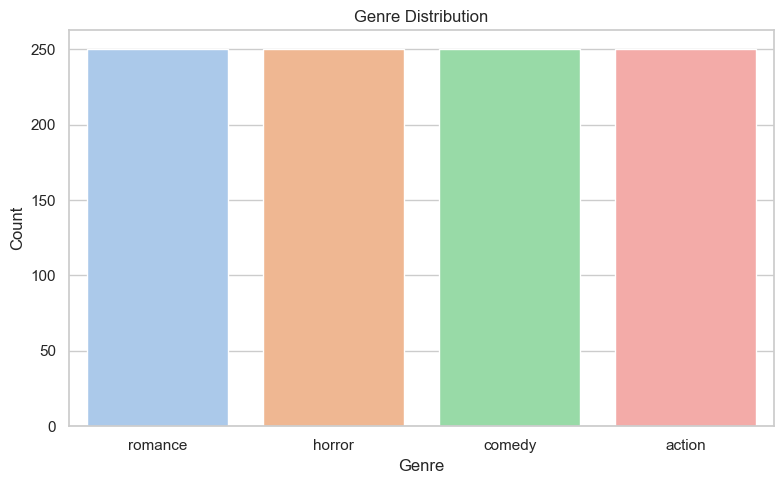

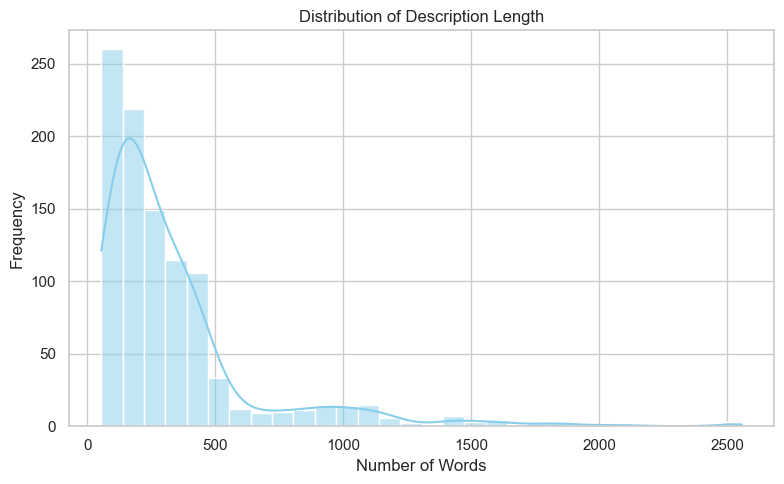

C:\Users\15801\AppData\Local\Temp\ipykernel_26668\2942451122.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(terms), palette='viridis')


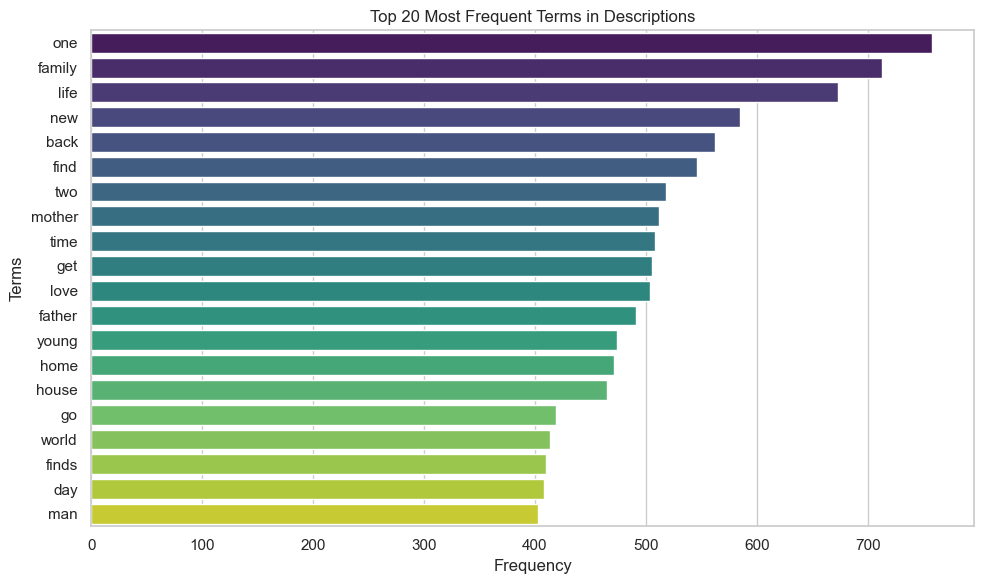

In [24]:
print(df.info())
print(df['genre'].value_counts())
print(df['description'].str.len().describe())

df['description_length'] = df['description'].apply(lambda x: len(str(x).split()))

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.countplot(x='genre', data=df, palette='pastel')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['description_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Description Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

all_text = ' '.join(df['description'].astype(str).tolist()).lower()

tokens = word_tokenize(all_text)
stop_words = set(stopwords.words('english'))
tokens = [t for t in tokens if t.isalpha() and t not in stop_words]

word_freq = Counter(tokens)
top_terms = word_freq.most_common(20)

terms, freqs = zip(*top_terms)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(freqs), y=list(terms), palette='viridis')
plt.title('Top 20 Most Frequent Terms in Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Terms')
plt.tight_layout()
plt.show()

#### Clean Movie Columns

In [28]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]

    tagged = pos_tag(tokens)
    tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in tagged]

    unique_tokens = []
    for i, word in enumerate(tokens):
        if i == 0 or word != tokens[i - 1]:
            unique_tokens.append(word)

    return ' '.join(unique_tokens)

df['clean_description'] = df['description'].astype(str).apply(clean_text)
df

,movie_id,description,genre,description_length,clean_description
0,tt12783454,Elle Evans (Joey King) has finally completed h...,romance,2103,elle evans joey king finally complete high sch...
1,tt1798632,A young girl tries to understand how she myste...,horror,290,young girl try understand mysteriously gain po...
2,tt9214832,"In 1800s England, a well meaning but selfish y...",comedy,481,1800s england well mean selfish young woman me...
3,tt8522006,Abby Holland (Kristen Stewart) and Harper Cald...,romance,736,abby holland kristen stewart harper caldwell m...
4,tt21249656,Olga and Maks are 15 years apart. She is a suc...,romance,234,olga mak year apart successful woman establish...
...,...,...,...,...,...
995,tt11310608,"In front of their little boy, Camille and Geor...",romance,231,front little boy camille george dance favorite...
996,tt12298506,After losing his wife and his memory in a car ...,horror,79,lose wife memory car accident single father un...
997,tt14308636,Based on the true-life experiences of Dave Fis...,comedy,264,base truelife experience dave fishwick bank da...
998,tt10161886,A troupe of hilariously self-obsessed theater ...,comedy,135,troupe hilariously selfobsessed theater star s...


#### Example After Cleaning

In [27]:
# Get top terms for a few sample movies
terms = vectorizer.get_feature_names_out()
components = svd.components_[0]
top_indices = components.argsort()[::-1][:10]
top_terms = [terms[i] for i in top_indices]

print("\nTop keywords summarizing common themes:")
print(top_terms)

print("\nSummaries of sample movies:")
for i in [0, 1, 2]:
    print(f"\nMovie ID: {df.iloc[i]['movie_id']}")
    print(f"Genre: {df.iloc[i]['genre']}")
    print(f"Original: {df.iloc[i]['description']}\n")
    print(f"Cleaned: {df.iloc[i]['clean_description']}")


Top keywords summarizing common themes:
['life', 'love', 'family', 'young', 'woman', 'friend', 'mother', 'girl', 'father', 'man']

Summaries of sample movies:

Movie ID: tt12783454
Genre: romance
Original: Elle Evans (Joey King) has finally completed high school and goes on a road trip for a week with Noah Flynn (Jacob Elordi), Lee Flynn (Joel Courtney), and Rachel (Meganne Young). Now Elle can finally decide what to do with her future. Unluckily enough, Elle got accepted into two schools: Harvard and Berkeley. While Noah got into Harvard and Lee into Berkeley, she has to lie to them saying that she's got wait-listed to not crush their feelings. They have unforgettable adventures such as camping, fishing, watching a shooting star, going to an aquarium, and watching the sunset. Although, Lee and Elle have a rule saying that "they must always go to the same school as their bestie", she decides to think about it later. They leave for San Francisco embarking amazing adventures together.



#### Build a summarization tool and summarize a few of the movies.

In [35]:
def summarize_text(text, num_sentences=2):
    sentences = sent_tokenize(text)
    if len(sentences) <= num_sentences:
        return text

    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(sentences)

    svd = TruncatedSVD(n_components=1, random_state=42)
    svd_matrix = svd.fit_transform(X)

    top_sentence_idx = np.argsort(svd_matrix[:, 0])[::-1][:num_sentences]
    top_sentence_idx.sort()

    summary = ' '.join([sentences[i] for i in top_sentence_idx])
    return summary

In [36]:
print("Summaries of Sample Movies:\n")
for i in [0, 1, 2]:
    original_text = df.loc[i, 'description']
    summary = summarize_text(original_text, num_sentences=2)

    print(f"Movie ID: {df.loc[i, 'movie_id']}")
    print(f"Genre: {df.loc[i, 'genre']}")
    print("Summary:")
    print(summary)
    print('-' * 80)

Summaries of Sample Movies:

Movie ID: tt12783454
Genre: romance
Summary:
Her father agrees and Elle, Lee, Rachel, and Noah get settled in the beach house. Elle and Noah go out for a walk on the beach at night and Noah tells Elle that Chloe was going to be around and invited her to stay at the beach house.
--------------------------------------------------------------------------------
Movie ID: tt1798632
Genre: horror
Summary:
After being experimented on by a secret government entity called The Shop, Andy McGee develops psychic powers and meets the love of his life. In another flashback, a young Andy and his girlfriend Victoria "Vicky" Tomlinson talk to a doctor in a clinical trial, who explains to them that they will be injected with the experimental chemical drug Lot, which secretly gives them supernatural powers Andy gains telepathy, and Vicky obtains telekinesis.In the present day, Charlie is sitting at the kitchen table after having a nightmare.
----------------------------------

In [38]:
# Add Summary to df
df['summary'] = df['description'].apply(lambda x: summarize_text(x, num_sentences=5))
df

,movie_id,description,genre,description_length,clean_description,summary
0,tt12783454,Elle Evans (Joey King) has finally completed h...,romance,2103,elle evans joey king finally complete high sch...,"Her father agrees and Elle, Lee, Rachel, and N..."
1,tt1798632,A young girl tries to understand how she myste...,horror,290,young girl try understand mysteriously gain po...,After being experimented on by a secret govern...
2,tt9214832,"In 1800s England, a well meaning but selfish y...",comedy,481,1800s england well mean selfish young woman me...,Emma apologises to Mr Martin and Harriet is en...
3,tt8522006,Abby Holland (Kristen Stewart) and Harper Cald...,romance,736,abby holland kristen stewart harper caldwell m...,"However, on their way to the Caldwells' house,..."
4,tt21249656,Olga and Maks are 15 years apart. She is a suc...,romance,234,olga mak year apart successful woman establish...,Olga and Maks are 15 years apart. Olga and Mak...
...,...,...,...,...,...,...
995,tt11310608,"In front of their little boy, Camille and Geor...",romance,231,front little boy camille george dance favorite...,"In front of their little boy, Camille and Geor..."
996,tt12298506,After losing his wife and his memory in a car ...,horror,79,lose wife memory car accident single father un...,After losing his wife and his memory in a car ...
997,tt14308636,Based on the true-life experiences of Dave Fis...,comedy,264,base truelife experience dave fishwick bank da...,Based on the true-life experiences of Dave Fis...
998,tt10161886,A troupe of hilariously self-obsessed theater ...,comedy,135,troupe hilariously selfobsessed theater star s...,A troupe of hilariously self-obsessed theater ...
